# Inner and outer cell borders
When studying tissues, organisms and organoids, often the position of the cell and its membranes within the tissue is relevant. For example in many tissues with differentiate apical (at an apex, at the end) and basal (at the base) sides of cells. Starting from a cell segmentation label image, we can identify pixels that sit outside or inside of a structure made of cells. In the following example we work with a synthetic two-dimensional image of some cells forming an organoid. The same functions will also work in 3D.

In [1]:
import numpy as np
import pyclesperanto_prototype as cle

First, we build our synthetic dataset. It is made of 6 cell-centers we dilated to form an organoid.

In [2]:
points = np.asarray([
    [50, 50],
    [60, 60],
    [25, 40],
    [70, 30],
    [35, 65],
    [50, 25]
]).T
image = np.zeros((100, 100))
spots = cle.pointlist_to_labelled_spots(points, image)
cells = cle.dilate_labels(spots, radius=15)
spots.shape

(100, 100)

These are our cells:

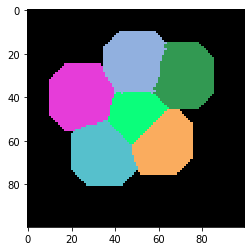

In [3]:
cle.imshow(cells, labels=True)

And that's the organoid:

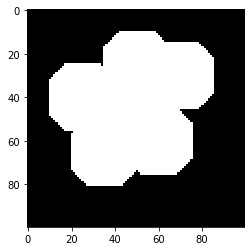

In [4]:
organoid = cells > 0
cle.imshow(organoid)

We now identify the pixels that sit on the borders of the cells.

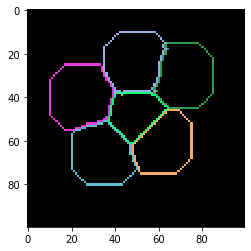

In [5]:
cell_borders = cle.reduce_labels_to_label_edges(cells)
cle.imshow(cell_borders, labels=True)

We can do exactly the same with the organoid to identify the pixels on its surface.

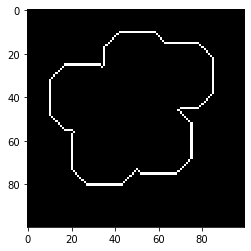

In [6]:
organoid_border = cle.reduce_labels_to_label_edges(organoid)
cle.imshow(organoid_border)

By masking the cell borders with the organoid border - technically that's a pixel-by-pixel multiplication - we can identify the outer borders.

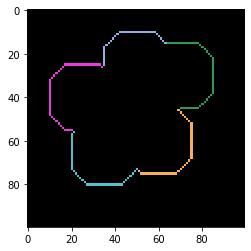

In [7]:
outer_borders = cle.mask(cell_borders, organoid_border)
cle.imshow(outer_borders, labels=True)

If we subtract the outer borders from all cell borders, we retrieve the inner borders

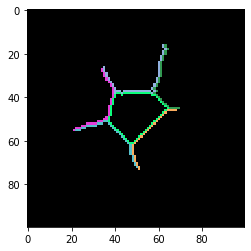

In [8]:
inner_borders = cell_borders - outer_borders
cle.imshow(inner_borders, labels=True)

When post-processing these label images, be a bit careful, because these images may not be sequentially labeled. There are libraries and functions which may have issues with those kind of label images (e.g. `cle.statistics_of_labelled_pixels()`). You can print out which labels exist in a label image using `np.unique()` and you could make the label images sequential using `cle.relabel_sequential()`.

In [9]:
np.unique(outer_borders)

array([0., 2., 3., 4., 5., 6.], dtype=float32)

In [10]:
np.unique(inner_borders)

array([0., 1., 2., 3., 4., 5., 6.], dtype=float32)